In [49]:
#import all the necessary packages
import numpy as np #for numerical array data
import pandas as pd #for tabular data
import matplotlib.pyplot as plt #for plotting purposes

%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import importlib as imp
import warnings
warnings.filterwarnings('ignore')

In [50]:
all_data = pd.read_csv("HDFCBANK.csv")
all_data.head(20)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1/3/2000,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
1,1/4/2000,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2,1/5/2000,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
3,1/6/2000,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
4,1/7/2000,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN
5,1/10/2000,HDFCBANK,EQ,168.35,172.90,179.50,165.00,166.30,165.90,167.79,100434,1.685217e+12,NaN,NaN,NaN
6,1/11/2000,HDFCBANK,EQ,165.90,166.50,167.90,157.00,163.00,163.40,161.40,145784,2.352907e+12,NaN,NaN,NaN
7,1/12/2000,HDFCBANK,EQ,163.40,163.75,167.95,162.30,165.10,165.45,163.89,85952,1.408658e+12,NaN,NaN,NaN
8,1/13/2000,HDFCBANK,EQ,165.45,169.90,169.90,165.00,165.95,165.10,165.26,48276,7.977871e+11,NaN,NaN,NaN
9,1/14/2000,HDFCBANK,EQ,165.10,168.00,168.00,164.00,166.00,165.45,164.68,58152,9.576544e+11,NaN,NaN,NaN


**Linear Regression-OLS Model via Scikit-learn**

In [51]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**STEP1=CREATE FEATURES AND LABEL**

In [52]:
all_data=all_data.drop(['Date','Trades','Deliverable Volume','%Deliverble','Symbol','Series'],axis=1)
all_data['Volume_lag_1d'] = all_data['Volume'].shift(1)
#all_data['Turnover_lag_1d'] = all_data['Volume'].shift(1)
all_data.dropna(inplace=True)
x=all_data.drop(['Close','Volume','Turnover'],axis=1)
x.head()


,Prev Close,Open,High,Low,Last,VWAP,Volume_lag_1d
1,170.00,182.00,183.45,171.00,174.00,174.99,33259.0
2,173.80,170.00,173.90,165.00,168.00,169.20,168710.0
3,166.95,168.00,170.00,165.30,168.95,168.44,159820.0
4,168.30,162.15,171.00,162.15,170.75,166.79,85026.0
5,168.35,172.90,179.50,165.00,166.30,167.79,85144.0


In [53]:
y=all_data['Close']
y.head()

1    173.80
2    166.95
3    168.30
4    168.35
5    165.90
Name: Close, dtype: float64

**SCALE ALL VALUES BETWEEN 0 AND 1**
**HERE WE ARE TRYING TO CONVERT UNSTANDARDIZED COEFFICIENTS TO **STANDARDIZED COEFFICIENTS AND ALSO LIMITING COEFFICIENTS VALUES BETWEEN 0 AND 1**

In [54]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
scld=MinMaxScaler(feature_range=(0,1))
arr_scld=scld.fit_transform(x)
x_scld=pd.DataFrame(arr_scld,columns=x.columns)
x_scld.head()
x_scld.describe()


,Prev Close,Open,High,Low,Last,VWAP,Volume_lag_1d
0,0.002747,0.008258,0.006438,0.005841,0.004583,0.005641,0.000320
1,0.004329,0.003266,0.002484,0.003338,0.002083,0.003237,0.001667
2,0.001478,0.002434,0.000869,0.003463,0.002479,0.002922,0.001579
3,0.002040,0.000000,0.001283,0.002149,0.003229,0.002237,0.000835
4,0.002060,0.004472,0.004803,0.003338,0.001375,0.002652,0.000836


,Prev Close,Open,High,Low,Last,VWAP,Volume_lag_1d
count,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000,5305.000000
mean,0.351255,0.351720,0.352839,0.349221,0.351884,0.351009,0.020868
std,0.264615,0.264333,0.265546,0.262636,0.264866,0.263744,0.039425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.131764,0.133369,0.132090,0.132015,0.132500,0.132300,0.003030
50%,0.321179,0.323460,0.325453,0.319272,0.322167,0.322114,0.009380
75%,0.523539,0.524929,0.526662,0.518213,0.525000,0.522716,0.021086
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


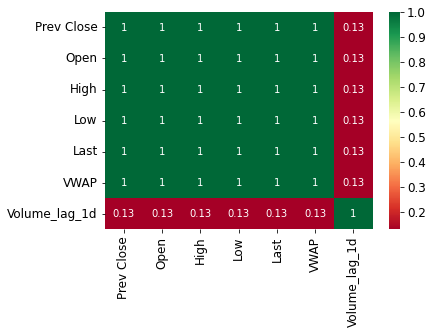

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.subplots(figsize=(10,10))
sns.heatmap(x_scld.corr(),cmap='RdYlGn',annot=True)
plt.show()

**STEP2 SPLIT TEST AND TRAIN**

In [56]:
train_x,test_x,train_y,test_y=train_test_split(x_scld,y,test_size=0.20,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(4244, 7)

(1061, 7)

(4244,)

(1061,)

**STEP 3:CREATE INSTANT OF THE MODEL**

In [57]:
lm=LinearRegression()
lm

LinearRegression()

**STEP 4:FIT THE MODEL**

In [58]:
lm.fit(train_x,train_y)

LinearRegression()

In [59]:
predicted_values=lm.predict(test_x)
predicted_values

array([1154.52405251, 1792.06385057, 1250.08864071, ...,  239.39422736,
        935.51604703,  679.0120936 ])

**STEP6-EVALUATE MODEL PERFORMANCE for Linear Regression-OLS Mode**

**MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [60]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(mean_absolute_error(predicted_values,test_y),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


2.034

**MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [61]:
from sklearn.metrics import mean_squared_error
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
mse=np.round(mean_squared_error(predicted_values,test_y),3)
mse

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


11.83

**ROOT MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [62]:
import math
math.sqrt(mse)

3.4394767043839676

**MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [63]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(median_absolute_error(predicted_values,test_y),3)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


1.144

**Mean Absolute Percentage Error FOR TEST DATA**

In [64]:
mape = np.mean(np.abs((test_y - predicted_values)/test_y))*100
print("MAPE FOR TEST DATA IS")
np.round(mape,3)

MAPE FOR TEST DATA IS


0.227

In [65]:
print(lm.coef_)
df_m=pd.DataFrame({'features':x.columns,'coeff':lm.coef_})

[-1.04409117e-01 -1.13192860e+02 -6.87924054e+00  2.59081913e+01
  1.87444560e+03  6.22334587e+02 -2.29597815e+00]


In [66]:
df_m=df_m.sort_values(by=['coeff'])
df_m

,features,coeff
1,Open,-113.192860
2,High,-6.879241
6,Volume_lag_1d,-2.295978
0,Prev Close,-0.104409
3,Low,25.908191
5,VWAP,622.334587
4,Last,1874.445595


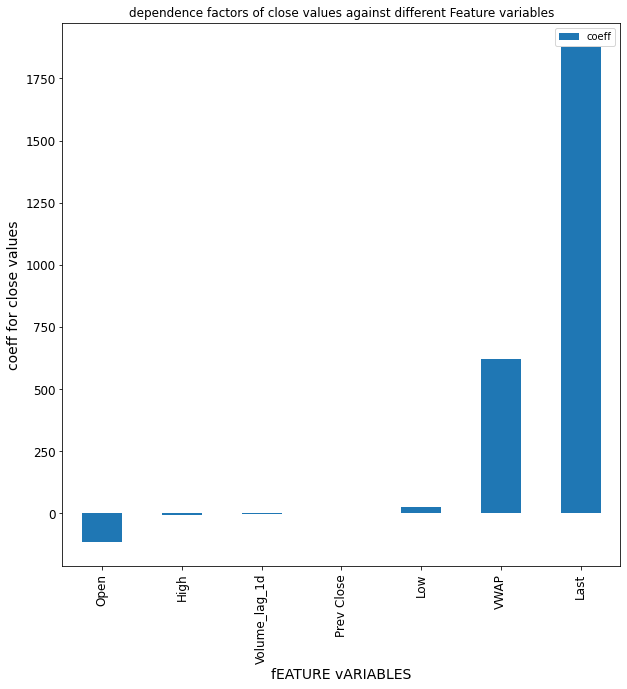

In [67]:
df_m.plot(x='features',y='coeff',kind='bar',figsize=(10,10))
plt.title('dependence factors of close values against different Feature variables')
plt.xlabel('fEATURE vARIABLES')
plt.ylabel('coeff for close values')
plt.show();

**Lasso Regression via Scikit-learn**

In [68]:
arr_scld=scld.fit_transform(x)
x_scld=pd.DataFrame(arr_scld,columns=x.columns)
x_scld.head()

,Prev Close,Open,High,Low,Last,VWAP,Volume_lag_1d
0,0.002747,0.008258,0.006438,0.005841,0.004583,0.005641,0.000320
1,0.004329,0.003266,0.002484,0.003338,0.002083,0.003237,0.001667
2,0.001478,0.002434,0.000869,0.003463,0.002479,0.002922,0.001579
3,0.002040,0.000000,0.001283,0.002149,0.003229,0.002237,0.000835
4,0.002060,0.004472,0.004803,0.003338,0.001375,0.002652,0.000836


In [69]:
train_x,test_x,train_y,test_y=train_test_split(x_scld,y,test_size=0.20,random_state=1)

In [70]:
from sklearn.linear_model import Lasso
lambda1 =0.1

In [71]:
lassoReg = Lasso(alpha=lambda1/(2*all_data.shape[0]), fit_intercept=True)

In [72]:
lassoReg.fit(train_x,train_y)

Lasso(alpha=9.42507068803016e-06)

In [73]:

predicted_values=lassoReg.predict(test_x)
predicted_values

array([1158.87793259, 1777.41880665, 1240.77551858, ...,  238.15723861,
        928.95095633,  684.05857414])

**EVALUATE MODEL PERFORMANCE for Lasso Regression**

**MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [74]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(mean_absolute_error(predicted_values,test_y),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


7.555

**MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [75]:
from sklearn.metrics import mean_squared_error
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
mse=np.round(mean_squared_error(predicted_values,test_y),3)
mse

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


132.627

**ROOT MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [77]:
import math
math.sqrt(mse)

11.51637963945267

**MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [78]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(median_absolute_error(predicted_values,test_y),3)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


4.665

**Mean Absolute Percentage Error FOR TEST DATA**

In [79]:
mape = np.mean(np.abs((test_y - predicted_values)/test_y))*100
print("MAPE FOR TEST DATA IS")
np.round(mape,3)

MAPE FOR TEST DATA IS


0.85

In [80]:
print(lassoReg.coef_)
df_m=pd.DataFrame({'features':x.columns,'coeff':lassoReg.coef_})

[-165.70623396 1266.3988648   874.34900789  168.18338458  735.15190528
 -479.0775869   -12.2831519 ]


In [81]:
df_m=df_m.sort_values(by=['coeff'])
df_m

,features,coeff
5,VWAP,-479.077587
0,Prev Close,-165.706234
6,Volume_lag_1d,-12.283152
3,Low,168.183385
4,Last,735.151905
2,High,874.349008
1,Open,1266.398865


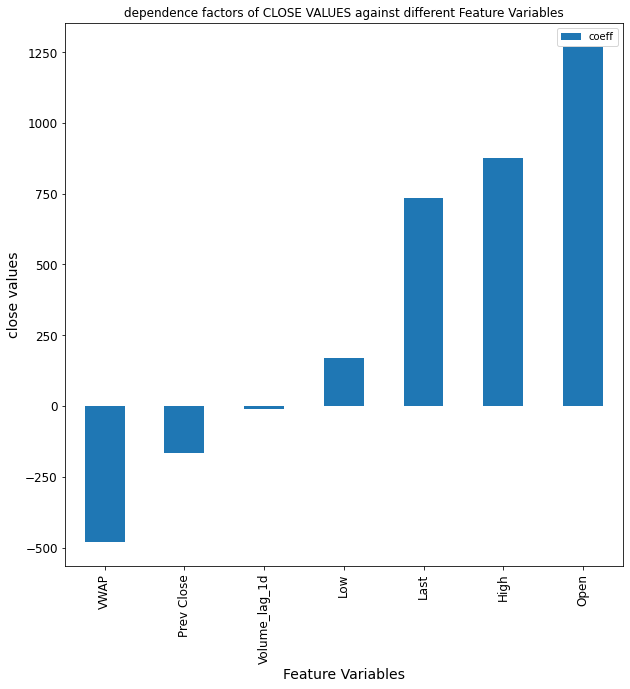

In [82]:
df_m.plot(x='features',y='coeff',kind='bar',figsize=(10,10))
plt.title('dependence factors of CLOSE VALUES against different Feature Variables')
plt.xlabel('Feature Variables')
plt.ylabel('close values')
plt.show();

**CV Lasso via Scikit-learn**

In [83]:
train_x,test_x,train_y,test_y=train_test_split(x_scld,y,test_size=0.20,random_state=1)

In [84]:
from sklearn.model_selection import GridSearchCV
maxLambda1 = .25
nLambdas = 100
randomState = 7777
nFolds = 10

In [85]:
alphaMax = maxLambda1 / (2*all_data.shape[0])
alphas = np.linspace(1e-6, alphaMax,nLambdas)
lassoTest = Lasso(random_state = randomState, fit_intercept=True)
tuned_parameters = [{'alpha': alphas}]
clf = GridSearchCV(lassoTest, tuned_parameters, cv=nFolds, refit=True)

In [86]:

clf.fit(train_x,train_y)
lassoBest = clf.best_estimator_
alphaBest = clf.best_params_['alpha']

GridSearchCV(cv=10, estimator=Lasso(random_state=7777),
             param_grid=[{'alpha': array([1.00000000e-06, 1.22790583e-06, 1.45581165e-06, 1.68371748e-06,
       1.91162330e-06, 2.13952913e-06, 2.36743495e-06, 2.59534078e-06,
       2.82324660e-06, 3.05115243e-06, 3.27905825e-06, 3.50696408e-06,
       3.73486991e-06, 3.96277573e-06, 4.19068156e-06, 4.41858738e-06,
       4.64649321e-06, 4.87439903e-0...
       1.83208427e-05, 1.85487486e-05, 1.87766544e-05, 1.90045602e-05,
       1.92324660e-05, 1.94603719e-05, 1.96882777e-05, 1.99161835e-05,
       2.01440893e-05, 2.03719952e-05, 2.05999010e-05, 2.08278068e-05,
       2.10557126e-05, 2.12836185e-05, 2.15115243e-05, 2.17394301e-05,
       2.19673359e-05, 2.21952418e-05, 2.24231476e-05, 2.26510534e-05,
       2.28789592e-05, 2.31068651e-05, 2.33347709e-05, 2.35626767e-05])}])

In [87]:
lassoBest

Lasso(alpha=2.3562676720075402e-05, random_state=7777)

In [88]:
alphaBest

2.3562676720075402e-05

In [89]:
predicted_values=clf.predict(test_x)
predicted_values

array([1158.8777127 , 1777.42177064, 1240.77662187, ...,  238.15742604,
        928.95069839,  684.05703043])

**EVALUATE MODEL PERFORMANCE for CV Lasso**

**MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [90]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(mean_absolute_error(predicted_values,test_y),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


7.554

**MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [91]:
from sklearn.metrics import mean_squared_error
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
mse=np.round(mean_squared_error(predicted_values,test_y),3)
mse

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


132.591

**ROOT MEAN SQUARE ERROR (MSE) FOR TEST DATA**

In [92]:
import math
math.sqrt(mse)

11.5148165421773

**MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA**

In [93]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
np.round(median_absolute_error(predicted_values,test_y),3)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


4.664

**Mean Absolute Percentage Error FOR TEST DATA**

In [94]:
mape = np.mean(np.abs((test_y -predicted_values)/test_y))*100
print("MAPE FOR TEST DATA IS")
np.round(mape,3)

MAPE FOR TEST DATA IS


0.849

In [95]:
print(lassoBest.coef_)
df_m=pd.DataFrame({'features':x.columns,'coeff':lassoBest.coef_})

[-165.71335921 1266.0829132   874.30970454  168.23216121  735.06010027
 -478.67068165  -12.26990489]


In [96]:
df_m=df_m.sort_values(by=['coeff'])
df_m

,features,coeff
5,VWAP,-478.670682
0,Prev Close,-165.713359
6,Volume_lag_1d,-12.269905
3,Low,168.232161
4,Last,735.060100
2,High,874.309705
1,Open,1266.082913


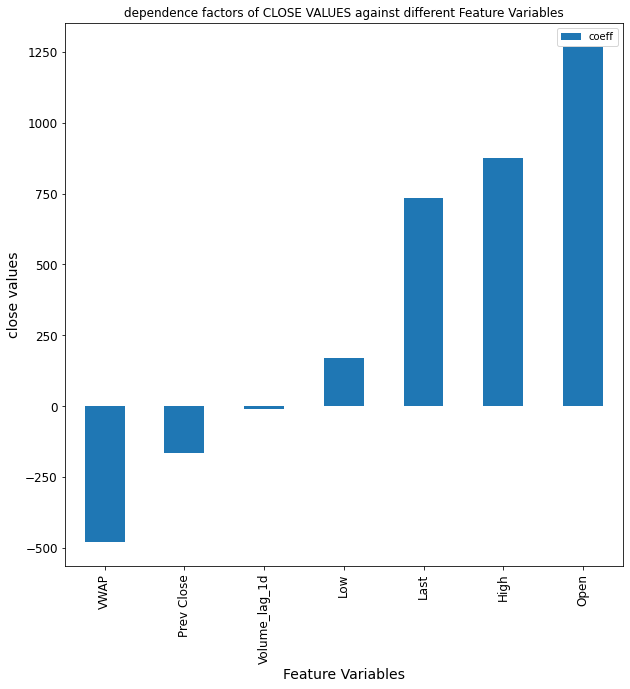

In [97]:
df_m.plot(x='features',y='coeff',kind='bar',figsize=(10,10))
plt.title('dependence factors of CLOSE VALUES against different Feature Variables')
plt.xlabel('Feature Variables')
plt.ylabel('close values')
plt.show();

In [99]:
!jupyter nbconvert StockMarketPrediction_OLS_LASSO_CVLASSO.ipynb

[NbConvertApp] Converting notebook StockMarketPrediction_OLS_LASSO_CVLASSO.ipynb to html
[NbConvertApp] Writing 480763 bytes to StockMarketPrediction_OLS_LASSO_CVLASSO.html
